In [1]:
###hdf file package
from pyhdf.SD  import SD, SDC
from pyhdf.V import *
from pyhdf.HDF import *
###
import glob
import os
import ssl
from urllib.request import urlopen, Request
##os.environ need to change if you use the script on work station
os.environ['PROJ_LIB'] = 'D:\\program\\anaconda3\\Library\\share\\'
###data processing assoicated package
import pprint
import gc
import datetime
import numpy as np
import cv2
###drawing package
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

In [2]:
#####Fuction for extracting variable names from hdf file
def HDFvars(File):
    hdfFile = SD(File, SDC.READ)
    dsets = hdfFile.datasets()
    k = []
    for key in dsets.keys():
        k.append(key)
    k.sort()
    hdfFile.end() # close the file
    return k
#####Function end

file path MOD021KM.A2021001.0040.061.2021001130650.hdf
(3,)
(406, 271)
(406, 271)
(2030, 1354)
[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [ 1867  1806  1993 ...  3632  3651  3622]
 [ 1741  1743  1999 ...  3697  3715  3489]
 [ 1722  1732  1923 ...  3736  3762  3646]]


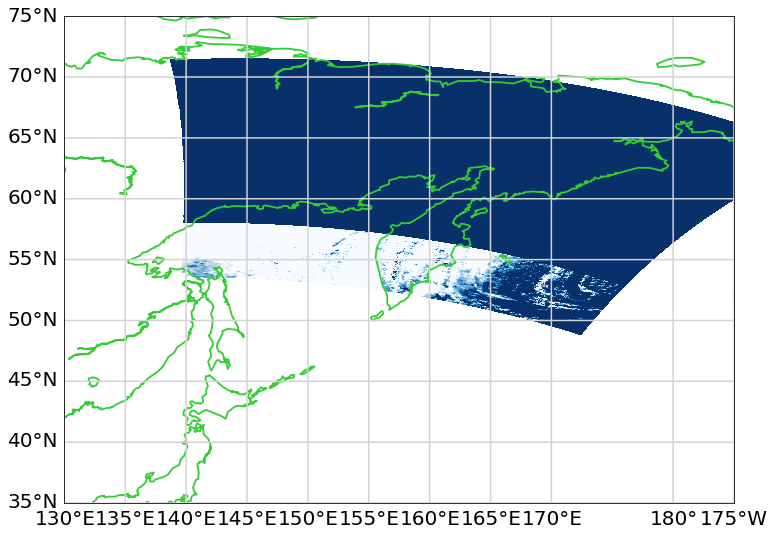

In [10]:
filefolder='MODIS'
for k in range(0,1):
    #file_year=str(k)
    #filepath = 'C:\\Users\\linnick\\Desktop\\' + filefolder +'\\'
#    filepath = '/data/dadm1/obs/CloudSat/hdf-GEOPROF/'  + file_year +'/'
##
    target_file= 'MOD02' + '*.061.*'+ '.hdf'
    search_file = glob.glob(target_file)
    test_len=len(search_file)
    if test_len != 0:
        files = search_file


    print('file path',search_file [0])
    filenum=np.shape(files)
    print(filenum)
    for k in range(0,1):#filenum[0]):
        FILE_NAME = search_file[k]
        hdf = SD(FILE_NAME, SDC.READ)
        #print(aaaaa)
# Read geolocation dataset.
        lat = hdf.select('Latitude')
        print(lat)
        latitude_modis = lat[:,:]
        lon = hdf.select('Longitude')
        longitude_modis = lon[:,:]
        print(longitude_modis.shape)
        print(latitude_modis.shape)
        longitude_modis[longitude_modis<0]=longitude_modis[longitude_modis<0]+360
        fin_lon= cv2.resize(longitude_modis, (1354, 2030), interpolation=cv2.INTER_LINEAR)
        fin_lat= cv2.resize(latitude_modis, (1354, 2030), interpolation=cv2.INTER_LINEAR)
        print(fin_lon.shape)
# Read dataset.
        test = hdf.select('EV_500_Aggr1km_RefSB')
        #print(test)
#pprint.pprint(top_temp.attributes())
        #for key, value in test.attributes().items():
        #    print(key, value)
        #    if key == 'add_offset':
        #        add_offset = value
         #   if key == 'scale_factor':
         #       scale_factor = value
        test_modis = test[:,:]
        aa=test_modis[0,:,:]
        hdf.end()
        #plt.imshow(test_modis[4,:,:])
        fig = plt.figure(figsize=(12,9))
        m = Basemap(llcrnrlon=130, urcrnrlon=185, llcrnrlat=35, urcrnrlat=75,resolution='l')
#m.drawmapboundary(fill_color='k')
        m.drawcoastlines(linewidth=1.8,color='limegreen')
        m.drawparallels(np.arange(-100., 120., 5.), labels=[1, 0, 0, 0], linewidth=1.5,dashes=(None,None), color='lightgray', fontsize=20)
        m.drawmeridians(np.arange(-180., 171., 5.), labels=[0, 0, 0, 1], linewidth=1.5,dashes=(None,None), color='lightgray', fontsize=20)
        x, y = m(fin_lon, fin_lat)
        print(aa)
        m.pcolormesh(fin_lon, fin_lat, aa,cmap=plt.cm.get_cmap('Blues',16), vmin=2000, vmax=3000)